---------------------------
# splitting the data in to X & Y model after outlier treatment

In [ ]:
#splitting the data in to X & Y 
x2=df.drop('concrete_compressive_strength', axis=1)
x2.head(2)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28


In [ ]:
y2=df['concrete_compressive_strength']
y2.head(2)

0    79.99
1    61.89
Name: concrete_compressive_strength, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x2test,y2train,y2test=train_test_split(x2,y2,test_size=0.2,random_state=101)
x_tr.shape,x2test.shape,y2train.shape,y2test.shape

((824, 8), (206, 8), (824,), (206,))

-----------------------
### Linear regression on model after outlier treatment

In [ ]:
from sklearn import linear_model, metrics

# Create and fit the linear regression model
lr = linear_model.LinearRegression()
lr.fit(x_tr, y2train)

# Calculate R-squared and Adjusted R-squared
lin_eda_r2 = lr.score(x_tr, y2train)
lin_eda_ar2 = 1 - ((1 - lin_eda_r2) * (len(x_tr) - 1)) / (len(x_tr) - len(x_tr.columns) - 1)

# Make predictions on the test data
p1 = lr.predict(x2test)

# Calculate Root Mean Squared Error
lin_eda_mse = metrics.mean_squared_error(y2test, p1)
lin_eda_rmse = np.sqrt(lin_eda_mse)

# Print the results
print(f"R2: {lin_eda_r2:.4f}")
print(f"Adjusted R2: {lin_eda_ar2:.4f}")
print(f"RMSE: {lin_eda_rmse:.4f}")


R2: 0.6158
Adjusted R2: 0.6120
RMSE: 11.1406


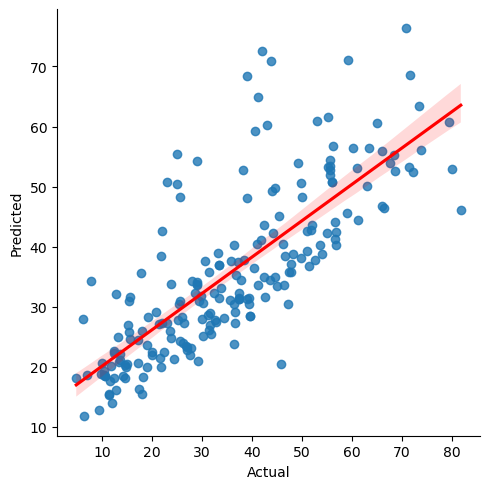

In [ ]:
lin_df_1=pd.DataFrame({"Actual":y2test,"Predicted":p1})
lin_df_1.head(3)
sns.lmplot(x="Actual",y="Predicted",data=lin_df_1,fit_reg=True,line_kws={"color": "red"})
plt.show()

-------------------------
## Lasso

R2: 0.6155
Adjusted R2: 0.6118
RMSE: 11.1558


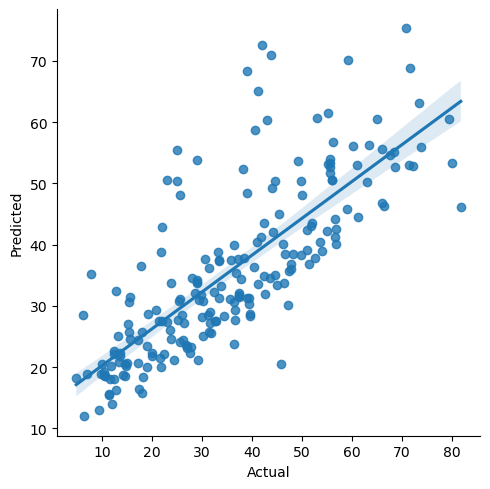

In [ ]:
from sklearn.linear_model import Lasso
from sklearn import metrics
import seaborn as sns

# Lasso Regression
la = Lasso()
la.fit(x_tr, y2train)

# Predictions
las_eda_p = la.predict(x2test)

# Evaluation
las_eda_r2 = la.score(x_tr, y2train)
las_eda_ar2 = 1 - ((1 - las_eda_r2) * (len(x_tr) - 1)) / (len(x_tr) - len(x_tr.columns) - 1)
las_eda_mse = metrics.mean_squared_error(y2test, las_eda_p)
las_eda_rmse = np.sqrt(las_eda_mse)

# Display Results
print(f"R2: {las_eda_r2:.4f}")
print(f"Adjusted R2: {las_eda_ar2:.4f}")
print(f"RMSE: {las_eda_rmse:.4f}")

# Display Actual vs. Predicted
df1 = pd.DataFrame({"Actual": y2test, "Predicted": las_eda_p})
sns.lmplot(data=df1, x="Actual", y="Predicted")

---------------------------------
## Ridge

R2: 0.6158
Adjusted R2: 0.6120
RMSE: 11.1406


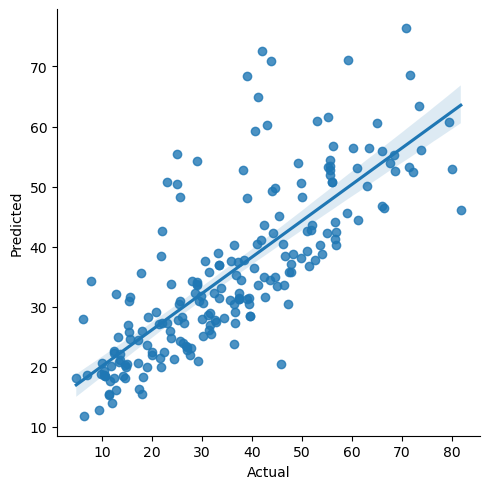

In [ ]:
from sklearn.linear_model import Ridge
from sklearn import metrics
import seaborn as sns

# Ridge Regression
rd = Ridge()
rd.fit(x_tr, y2train)

# Predictions
rid_eda_p = rd.predict(x2test)

# Evaluation
rid_eda_r2 = rd.score(x_tr, y2train)
rid_eda_ar2 = 1 - ((1 - rid_eda_r2) * (len(x_tr) - 1)) / (len(x_tr) - len(x_tr.columns) - 1)
rid_eda_mse = metrics.mean_squared_error(y2test, rid_eda_p)
rid_eda_rmse = np.sqrt(rid_eda_mse)

# Display Results
print(f"R2: {rid_eda_r2:.4f}")
print(f"Adjusted R2: {rid_eda_ar2:.4f}")
print(f"RMSE: {rid_eda_rmse:.4f}")


# Display Actual vs. Predicted
df5 = pd.DataFrame({"Actual": y2test, "Predicted": rid_eda_p})
sns.lmplot(data=df5, x="Actual", y="Predicted")


--------------------------
## XGB Regressor

In [ ]:
from xgboost import XGBRFRegressor
xgbr = XGBRFRegressor()
xgbr.fit(x_tr,y2train)
xgbr_p_1 = xgbr.predict(x2test)
xgbr_eda_r2 = xgbr.score(x_tr,y2train)
print("R square:", xgbr_eda_r2)
n = x_tr.shape[0]  # Number of observations
k = x_tr.shape[1]  # Number of predictors (features)
xgbr_eda_ar2 = 1 - ((1 - xgbr_eda_r2) * (n - 1) / (n - k - 1))
print("Adjusted R square:", xgbr_eda_ar2)
from sklearn import metrics
xgbr_eda_mse = metrics.mean_squared_error(y2test,xgbr_p_1)
# print("mse:", xgbr_eda_mse)
xgbr_eda_rmse = np.sqrt(xgbr_eda_mse)
print("XGBR rmse:- ",xgbr_eda_rmse)

R square: 0.9238144025487851
Adjusted R square: 0.9230665684633744
XGBR rmse:-  6.316848714303042


--------------------------
## RF-Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_tr,y2train)
rfr_p_1 = rfr.predict(x2test)
rfr_eda_r2 = rfr.score(x_tr,y2train)
print("R square:", rfr_eda_r2)
n = x_tr.shape[0]  # Number of observations
k = x_tr.shape[1]  # Number of predictors (features)
rfr_eda_ar2 = 1 - ((1 - rfr_eda_r2) * (n - 1) / (n - k - 1))
print("Adjusted R square:", rfr_eda_ar2)
from sklearn import metrics
rfr_eda_mse = metrics.mean_squared_error(y2test,rfr_p_1)
# print("mse:", rfr_eda_mse)
rfr_eda_rmse = np.sqrt(rfr_eda_mse)
print("rfr rmse:- ",rfr_eda_rmse)

R square: 0.9866963040765369
Adjusted R square: 0.9865657156502943
rfr rmse:-  5.365705246172966


# Comparision of model

In [ ]:
list1=['linear','Lasso','Ridge','RFR','XGBR']
list2=[lin_eda_r2,las_eda_r2,rid_eda_r2,rfr_eda_r2,xgbr_eda_r2]
list3=[lin_eda_ar2,las_eda_ar2,rid_eda_ar2,rfr_eda_ar2,xgbr_eda_ar2]
list4=[lin_eda_rmse,las_eda_rmse,rid_eda_rmse,rfr_eda_rmse,xgbr_eda_rmse]

In [ ]:
final2=pd.DataFrame({'modelname':list1,'r2':list2,'a_r2':list3,'rmse':list4})
final2

,modelname,r2,a_r2,rmse
0,linear,0.615753,0.611981,11.140643
1,Lasso,0.615527,0.611753,11.155848
2,Ridge,0.615753,0.611981,11.140644
3,RFR,0.986696,0.986566,5.365705
4,XGBR,0.923814,0.923067,6.316849
